In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('./data/DATA.csv')

print(df.shape)
df.head()

(12202, 17)


,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6sxptembJVty4sNtcPMAVz,Man! I Feel Like A Woman!,Shania Twain,75,1997-11-04,0.657,0.639,10,-7.527,1,0.5810,0.000000,0.2780,0.674,124.882,234493,4
1,6iy4PoAuZBMvtrlDX4VxC7,Check Yes Or No,George Strait,69,1995-09-12,0.708,0.524,5,-12.644,1,0.0551,0.000003,0.0371,0.690,111.482,200667,4
2,4w3tQBXhn5345eUXDGBWZG,9 to 5,Dolly Parton,75,1980,0.554,0.783,6,-5.852,1,0.4160,0.000002,0.6310,0.813,105.390,162467,4
3,5KqldkCunQ2rWxruMEtGh0,The Gambler,Kenny Rogers,73,1978-11-20,0.671,0.501,4,-13.119,1,0.3420,0.000000,0.1940,0.860,87.040,214880,4
4,6xHI9KjUjYT0FPtGO8Mxa1,Hurricane,Luke Combs,73,2017-06-02,0.464,0.813,10,-6.185,1,0.0153,0.000000,0.2540,0.515,75.977,222533,4


In [43]:
# Check for null values
pd.isnull(df).sum()

id                  0
title               1
all_artists         1
popularity          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [44]:
# Drop rows containing null values as they aren't a significant number
df.dropna(inplace = True)
df.shape

(12201, 17)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12201 entries, 0 to 12201
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12201 non-null  object 
 1   title             12201 non-null  object 
 2   all_artists       12201 non-null  object 
 3   popularity        12201 non-null  int64  
 4   release_date      12201 non-null  object 
 5   danceability      12201 non-null  float64
 6   energy            12201 non-null  float64
 7   key               12201 non-null  int64  
 8   loudness          12201 non-null  float64
 9   mode              12201 non-null  int64  
 10  acousticness      12201 non-null  float64
 11  instrumentalness  12201 non-null  float64
 12  liveness          12201 non-null  float64
 13  valence           12201 non-null  float64
 14  tempo             12201 non-null  float64
 15  duration_ms       12201 non-null  int64  
 16  time_signature    12201 non-null  int64 

In [46]:
#Dropping duplicate songs
df.drop_duplicates(['id'], inplace = True)
df.shape

(10595, 17)

In [47]:
#A bit of feature engineering...

#change release_date to release_year
df['release_year'] = df['release_date'].apply(lambda x: x.split('-')[0])
df.drop(columns = ['release_date'], inplace = True)
    
#Change duration in miliseconds to seconds and drop duration_ms column
df['duration'] = df['duration_ms'].apply(lambda x: round(x/1000))
df.drop(columns = ['duration_ms'], inplace = True)
df.head(1)

,id,title,all_artists,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,duration
0,6sxptembJVty4sNtcPMAVz,Man! I Feel Like A Woman!,Shania Twain,75,0.657,0.639,10,-7.527,1,0.581,0.0,0.278,0.674,124.882,4,1997,234


In [48]:
#Statistical scores
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,10595.0,42.753185,24.924423,0.000000,27.0000,47.000000,62.00000,100.000
danceability,10595.0,0.625693,0.167373,0.061600,0.5200,0.648000,0.74900,0.979
energy,10595.0,0.574374,0.267299,0.000707,0.4085,0.635000,0.78800,0.999
key,10595.0,5.378197,3.592064,0.000000,2.0000,6.000000,9.00000,11.000
loudness,10595.0,-9.665095,6.480120,-43.657000,-11.6960,-7.460000,-5.33850,0.985
mode,10595.0,0.600189,0.489882,0.000000,0.0000,1.000000,1.00000,1.000
acousticness,10595.0,0.347209,0.347534,0.000005,0.0476,0.198000,0.62600,0.996
instrumentalness,10595.0,0.169822,0.329506,0.000000,0.0000,0.000057,0.04895,0.985
liveness,10595.0,0.175741,0.143958,0.015000,0.0922,0.119000,0.20900,0.987
valence,10595.0,0.517023,0.264041,0.027600,0.2900,0.532000,0.74000,0.993


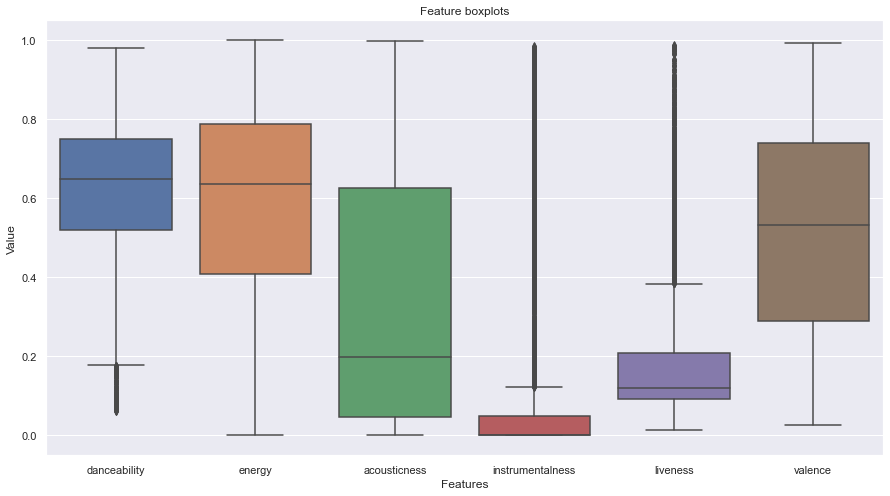

In [49]:
# Boxplot to display the above grid
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=df[['danceability', 'energy', 'acousticness', 'instrumentalness',
       'liveness', 'valence']]).set(title= 'Feature boxplots')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

In [50]:
# Show artist by popularity
artist_by_pop = df.groupby('all_artists').sum().sort_values('popularity', ascending = False)[:10]
artist_by_pop

,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
all_artists,,,,,,,,,,,,,
Bad Bunny,2432,26.069,24.915,196,-178.905,17,10.845000,0.019788,6.2694,18.6430,4033.036,140,7921
Taylor Swift,1685,15.031,14.355,108,-176.381,19,6.200300,0.030332,3.1601,11.2932,2733.041,96,5693
Shakira,1649,20.220,18.823,99,-156.910,19,5.609280,0.567401,3.7060,18.5570,3275.818,104,5766
Rihanna,1604,17.040,17.336,165,-136.930,12,2.925385,0.290053,4.0159,13.7200,3103.813,100,6044
Drake,1540,19.459,15.209,137,-159.123,13,2.611240,0.024909,4.0068,9.7441,2828.978,99,5553
Maluma,1456,21.710,22.169,159,-115.542,12,5.165100,0.002396,4.4838,19.6650,3420.788,112,5685
Ed Sheeran,1345,13.868,10.546,128,-126.838,16,8.790830,0.001854,3.3258,10.3590,2249.765,79,4497
Beyoncé,1324,14.341,15.380,109,-125.779,12,2.835220,0.014134,4.3625,12.2730,2836.685,88,5027
Daddy Yankee,1322,21.259,23.802,147,-130.300,18,4.186650,0.060281,4.8178,21.5360,3318.337,112,5941


In [51]:
# 10 least popular songs in the dataset
least_popular = df.sort_values('popularity', ascending = True)
least_popular.head(10)

,id,title,all_artists,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,duration
8363,2R7hA0FSq6cNq2XgLGxuQH,A Tan Solo una Hora,Ga'briel,0,0.794,0.851,1,-5.465,0,0.2050,0.000000,0.2730,0.950,124.999,4,2016,226
8177,4X4ZfZkupmtAUcjz0Cl2rI,Eres Mi Sueño - Versión Radio Edit,Fonseca,0,0.799,0.931,3,-6.090,0,0.1500,0.000073,0.0181,0.971,115.003,4,2011,194
6577,07w5CgkyS4pbhuRBvbxSaO,Keep Movin' On,Sam Cooke,0,0.585,0.411,7,-10.088,1,0.6380,0.000000,0.4840,0.689,108.935,4,2001,140
11996,7pPJHfOTUnIpNxmITf3HFj,Four Little Diamonds,Electric Light Orchestra,0,0.614,0.877,5,-6.990,1,0.0640,0.000345,0.5490,0.670,123.372,4,1983,245
8191,2S8qv1urJC6Q8USxKtYhpF,Toma Mi Vida,Juan Luis Guerra 4.40,0,0.809,0.871,10,-3.848,0,0.6310,0.000000,0.1100,0.921,121.036,4,2011,203
8192,4TwagA5d1hV3ncNV4DGBnB,Cómo Te Atreves,Morat,0,0.613,0.902,4,-4.423,1,0.0938,0.000000,0.1170,0.744,130.986,4,2015,241
8194,1330NqNMNdYpHKEfAVQqGV,No Te Pido Flores,Fanny Lu,0,0.726,0.866,1,-5.054,1,0.4840,0.000000,0.0999,0.863,103.975,4,2009,242
8198,42yc79BapfKffHxLPRIEht,El Problemon,Bonka,0,0.780,0.776,9,-6.159,1,0.0711,0.000000,0.1100,0.809,122.600,4,2006,214
8199,0ltIbWognQFt70SBWi0VEh,Te Doy Mi Vida,Lucas Arnau,0,0.718,0.759,6,-6.730,1,0.2930,0.000000,0.1570,0.773,95.906,4,2004,275
8203,5Y0KmwzfAbksOyOiWHwWKA,Carito,Carlos Vives,0,0.690,0.880,5,-5.366,1,0.0294,0.000000,0.0941,0.942,111.076,4,2001,218


In [52]:
# 10 most popular songs in the dataset
most_popular = least_popular.tail(10)
most_popular

,id,title,all_artists,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,duration
2449,0V3wPSX9ygBnCm8psDIegu,Anti-Hero,Taylor Swift,92,0.637,0.643,4,-6.571,1,0.13000,0.000002,0.1420,0.533,97.008,4,2022,201
2447,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),Kim Petras,92,0.714,0.472,2,-7.375,1,0.01300,0.000005,0.2660,0.238,131.121,4,2022,157
2473,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,SZA,93,0.644,0.735,8,-5.747,1,0.05210,0.144000,0.1610,0.418,88.980,4,2022,154
2463,5ww2BF9slyYgNOk37BlC4u,La Bachata,Manuel Turizo,93,0.835,0.679,7,-5.329,0,0.58300,0.000002,0.2180,0.850,124.980,4,2022,163
7970,0DWdj2oZMBFSzRsi2Cvfzf,TQG,Shakira,93,0.720,0.630,4,-3.547,0,0.67300,0.000000,0.0936,0.607,179.974,4,2023,199
10860,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),Bebe Rexha,93,0.561,0.965,7,-3.673,0,0.00383,0.000007,0.3710,0.304,128.040,4,2022,175
4462,7oDd86yk8itslrA9HRP2ki,Die For You - Remix,Ariana Grande,93,0.531,0.525,1,-6.500,0,0.23200,0.000000,0.4410,0.502,66.900,4,2023,233
2474,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),21 Savage,94,0.715,0.620,1,-6.005,0,0.41700,0.000000,0.0822,0.172,97.950,4,2022,222
2476,4nrPB8O7Y7wsOCJdgXkthe,"Shakira: Bzrp Music Sessions, Vol. 53",Shakira,96,0.778,0.632,2,-5.600,0,0.27400,0.000000,0.0915,0.498,122.104,4,2023,218
2472,0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,100,0.707,0.681,0,-4.325,1,0.06320,0.000005,0.0322,0.646,117.999,4,2023,200


In [53]:
#How many unique artists?
df.all_artists.nunique()

4750

In [54]:
df.all_artists.value_counts()[:10]

Johnny Cash      51
Joe Cocker       37
Bad Bunny        35
Eminem           32
50 Cent          32
George Strait    32
RIOPY            30
Maluma           28
Daddy Yankee     28
Shakira          26
Name: all_artists, dtype: int64

In [55]:
df.columns

Index(['id', 'title', 'all_artists', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'release_year',
       'duration'],
      dtype='object')

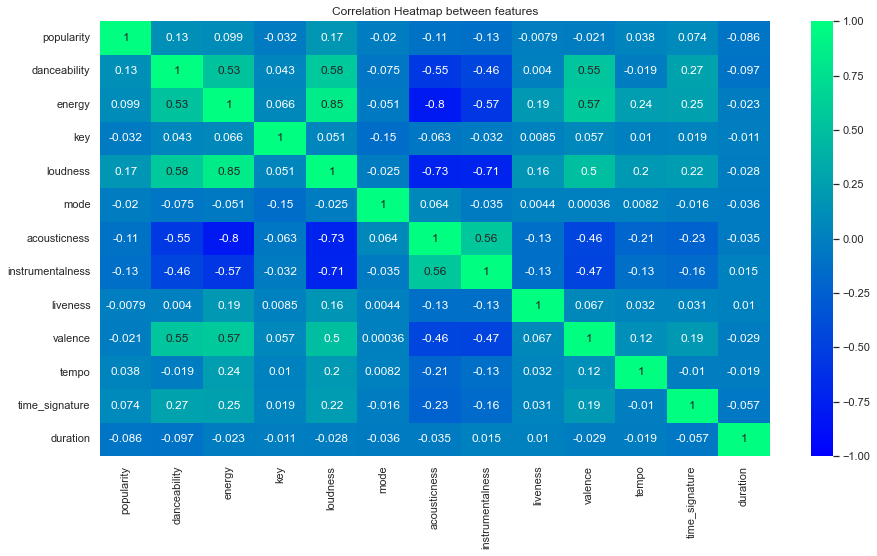

In [56]:
#Map the correlation of features
corr_df = df[['popularity', 'release_year',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration']].corr()

plt.figure(figsize = (15,8))
heatmap = sns.heatmap(corr_df,
                     annot = True,
                      vmin= -1,
                      vmax = 1,
                     cmap = 'winter',
                     linecolor='Black')
heatmap.set_title('Correlation Heatmap between features');

In [57]:
#Top 10 artists in terms of average energy compared to their average accousticness (really negative correlation between these features)
df[['all_artists','energy','acousticness']].groupby('all_artists').mean().sort_values(by='energy', ascending=False)[:10]

,energy,acousticness
all_artists,,
Captain Jack,0.999000,0.072600
Natasha,0.998000,0.023200
Culture Beat,0.997000,0.072600
Charly Lownoise & Mental Theo,0.996000,0.081200
Pin-occhio,0.995000,0.000336
Antiloop,0.995000,0.011000
E-Type,0.987333,0.014720
Willone,0.986000,0.000159
Cheyenne Giles,0.986000,0.073500


In [58]:
#How characteristics of songs change over the years
avgs_by_year = df[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'release_year',
       'duration']].groupby('release_year').mean().sort_values(by='release_year').reset_index()
avgs_by_year.head()

,release_year,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,1923,0.614,0.0423,-12.033,0.996,0.002930,0.1830,0.211,89.822,177.0
1,1927,0.541,0.0946,-19.886,0.882,0.000000,0.0979,0.470,166.893,193.0
2,1928,0.509,0.1050,-22.847,0.948,0.000005,0.1280,0.724,106.620,182.0
3,1929,0.673,0.3770,-14.141,0.586,0.000000,0.3320,0.713,88.973,201.0
4,1930,0.763,0.3650,-11.498,0.949,0.000000,0.5300,0.931,107.522,194.0


([<matplotlib.axis.XTick at 0x7fbe2c4239a0>], [Text(0, 0, '')])

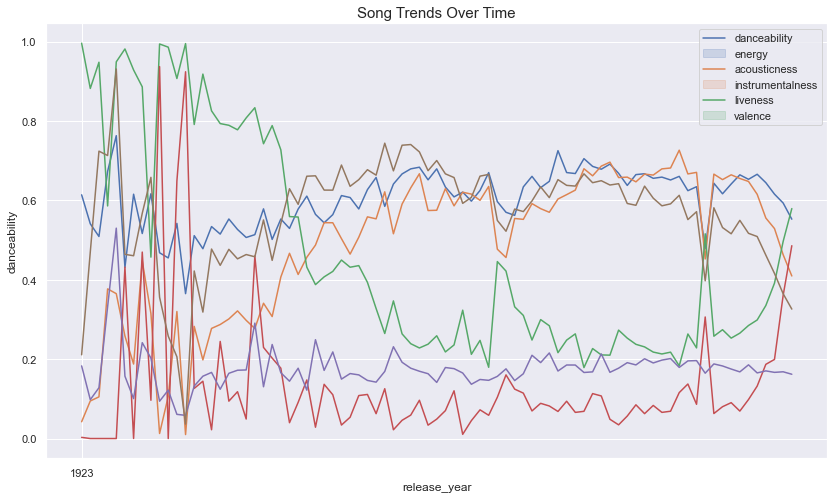

In [59]:
#Plot these changes
plt.figure(figsize=(14,8))
plt.title("Song Trends Over Time", fontsize=15)
lines = ['danceability', 'energy', 'acousticness', 'instrumentalness',
       'liveness', 'valence']
for line in lines:
    ax = sns.lineplot(x='release_year', y=line, data= avgs_by_year)
plt.legend(lines);
plt.xticks(np.arange(0,1,step=10))
